# **Developing Image Captioning Model With Deep Learning**

<a name='Problem-Statement'></a>
## **Problem Statement**
Developing an image captioning model with the ability to generate accurate and relevant captions for images, specifically aimed at assisting visually impaired individuals. The model will utilize deep learning techniques such as convolutional neural networks and long short-term memory networks, as well as pre-trained models for feature extraction and GloVe embeddings for text representation. The objective is to improve accessibility for visually impaired individuals by providing them with a more comprehensive understanding of the content of images through generated captions.

<a name='Background'></a>
## **Background**

Visual content, such as images and videos, are ubiquitous in today's digital world and are used in a wide range of applications, from social media and e-commerce to education and entertainment. However, for visually impaired individuals, these forms of content can be inaccessible, hindering their ability to fully participate in the digital world. To address this issue, researchers have developed various assistive technologies, such as screen readers and image recognition systems. One promising solution is image captioning models, which involve generating textual descriptions of images that can aid visually impaired individuals in understanding the content and context of the image.

However, despite the progress made in these models, there are still several challenges that need to be addressed. One major challenge is the ability of the model to capture the nuances of natural language and generate captions that are both accurate and easy to understand. Another challenge is the lack of diversity in existing datasets, which can result in biased and limited image captioning models.

In this project, we aim to develop a deep learning-based model for addressing these challenges and improve the accessibility of visual content for visually impaired individuals.

## **Contents:**
- [Problem Statement](#Problem-Statement)
- [Background](#Background)
- [Datasets](#Datasets)
- [Imports](#Imports)
- [Functions](#Functions)
- [Exploratory Data Analysis and Pre-Processing (EDA)](#Exploratory-Data-Analysis-(EDA))
- [EDA and Cleaning Summary](#EDA-Cleaning-Summary)

<a name='Datasets'></a>
## **Datasets**

The raw image datasets are provided from Flickr 8k Dataset from [Kaggle](https://www.kaggle.com/datasets/adityajn105/flickr8k): consisting of 8,000 images that are each paired with five different captions which provide clear descriptions of the salient entities and events.The images were chosen from six different Flickr groups, and tend not to contain any well-known people or locations, but were manually selected to depict a variety of scenes and situations.

<a name='Imports'></a>
## **Imports** <a id='Imports'></a>

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from textwrap import wrap
from string import punctuation
import nltk
from nltk.corpus import stopwords, wordnet
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_colwidth", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a name='Functions'></a>
## **Functions**

1. The function will be used to visualize sample images with captions.

2. The function will be used to clean the captions.

3. The function will be used to visualize the caption length distributions.

In [ ]:
# Read and display Image data
def read_images(path, img_size=224):
    
    # Load the image from file
    img = load_img(path, color_mode='rgb', target_size=(img_size, img_size))
    
    # Convert image pixels to array
    img = np.array(img)
    
    # Dividing by the maximal value
    img = img/255
    
    return img 

def display_images(sam_data, num_images):
    
    # Reset the index of sample data
    sam_data = sam_data.reset_index(drop=True)
    
    # Defining the plot size
    plt.figure(figsize = (12,8))
    
    n = 0
    
    for i in range(num_images):
        n += 1
        
        # Number of images in columns and rows of each subplot
        plt.subplot(3, 3, n)
        
        # Adjust the subplot layout parameter
        plt.subplots_adjust(hspace=0.8, wspace=0.5)
        
        # Define the path of the image
        path = image_path + '/' + sam_data['image'][i]
        
        # Execute the function on path
        image = read_images(path)
        
        # Show the image with it's caption
        plt.imshow(image)
        plt.title("\n".join(wrap(sam_data.caption[i], 25)))
        plt.axis('off')

In [ ]:
# Define the function for cleaning the captions
def text_preprocess(text):
    
    # Convert sentences into lowercase
    text['caption'] = text['caption'].apply(lambda c: c.lower())
    
    # Remove special characters and numbers present in the text
    text['caption'] = text['caption'].apply(lambda c: c.replace('[^A-Za-z]',''))
    
    # Remove punctuations in the text
    #text['caption'] = text['caption'].apply(lambda c: c.replace("!()-[]{};:\,<=>./?@#$%^&*_~''", ''))
        
    # Remove extra spaces
    text['caption'] = text['caption'].apply(lambda c: c.replace('\s+',' '))
    
    # Remove single characters
    text['caption'] = text['caption'].apply(lambda c: ' '.join([word for word in c.split() if len(word)>1]))
    
    # Add a starting and an ending tag to the sentences
    text['caption'] = 'startsen '+text['caption']+ ' endsen'
    
    return text

In [ ]:
# Define a function for plotting histogram
def plot_histogram(column_name, title, xaxis, yaxis, num_bins, color):
    plt.figure(figsize=(14, 9))
    plt.hist(df[column_name], bins= num_bins, color=color, edgecolor='black')
    plt.title(title, fontsize=15)
    plt.xlabel(xaxis, fontsize=12)
    plt.ylabel(yaxis, fontsize=12);

<a name='Exploratory-Data-Analysis-(EDA)'></a>
## **Exploratory Data Analysis (EDA) and Pre-Processing**

### **Load Data**

Here we will load images and captions to explore what it they look like and what we should do for cleaning.

In [ ]:
# Define the path of image and caption data
image_path = 'drive/MyDrive/Colab Notebooks/Capstone_Project/data/Images'
caption_path = 'drive/MyDrive/Colab Notebooks/Capstone_Project/data/captions.txt'

In [ ]:
# Read captions data
df = pd.read_csv(caption_path)

# Sample captions data 
print(f"Sample Data :{df.head()}")

print(f"\n--------------------------\n\n Columns : {df.columns[0]}, {df.columns[1]}")
print(f"\n--------------------------\n\n Size of the dataset : {df.shape[0]}")
print(f"\n--------------------------\n\n Number of Unique Images : {df['image'].nunique()}")

Sample Data :                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                                                    caption  
0  A child in a pink dress is climbing up a set of stairs in an entry way .  
1                                     A girl going into a wooden building .  
2                          A little girl climbing into a wooden playhouse .  
3                      A little girl climbing the stairs to her playhouse .  
4                 A little girl in a pink dress going into a wooden cabin .  

--------------------------

 Columns : image, caption

--------------------------

 Size of the dataset : 40455

--------------------------

 Number of Unique Images : 8091


### **Images with captions**

- In the following you could see the sample of images with its 5 different captions.

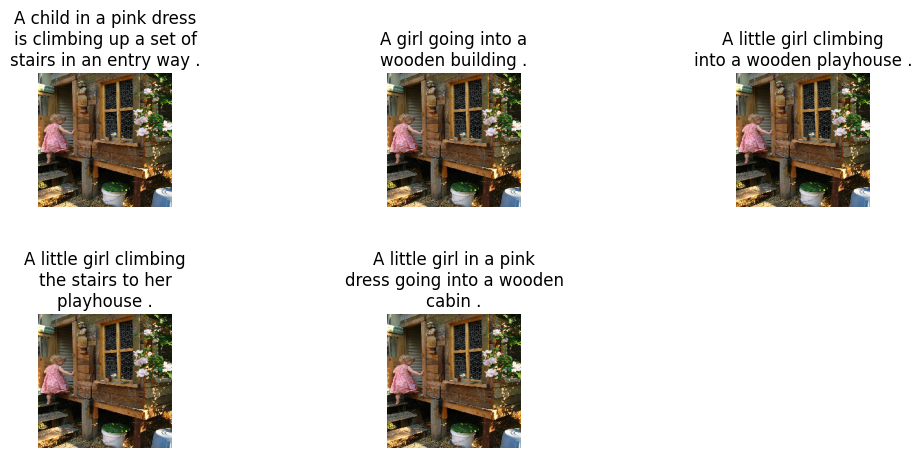

In [ ]:
# Display different five captions for one image
display_images(df.head(), 5)

- Also here we could see 6 different samples of images with their related captions.

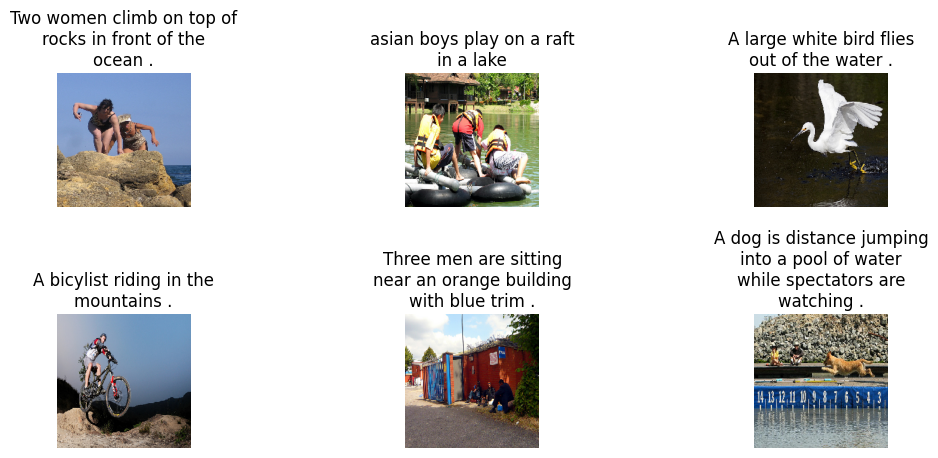

In [ ]:
# Display sample images with related caption
display_images(df.sample(6), 6)

## **Preprocessing and Clean The Text Data**

In image captioning, the goal is to generate natural language descriptions of an image. Caption preprocessing and cleaning are to remove noise and irrelevant information from the text data and to ensure consistency and readability in the captions. By properly cleaning and preprocessing the caption data, we can improve the accuracy and performance of the image captioning model. Here are the techniques that we will use in preprocessing and cleaning captions:

**Caption Text Preprocessing Steps**

- Convert sentences into lowercase
- Remove special characters and numbers present in the text
- Remove punctuations in the text
- Remove extra spaces
- Remove single characters
- Add starting and ending tags to the sentences to indicate the beginning and the ending of a sentence (By adding start and end tags, we are essentially giving the model a cue as to when the caption starts and ends. During training, the model learns to predict the next word in the caption given the previous words. By adding the start tag at the beginning, the model knows that it needs to start generating a caption, and by adding the end tag at the end, the model knows that it has completed generating the caption.)

Overall, the goal of caption preprocessing and cleaning is to remove noise and irrelevant information from the text data, and to ensure consistency and readability in the captions. By properly cleaning and preprocessing the caption data, we can improve the accuracy and performance of the image captioning model.

- Take a look at captions before cleaning

In [ ]:
df['caption'].head(10)

0                  A child in a pink dress is climbing up a set of stairs in an entry way .
1                                                     A girl going into a wooden building .
2                                          A little girl climbing into a wooden playhouse .
3                                      A little girl climbing the stairs to her playhouse .
4                                 A little girl in a pink dress going into a wooden cabin .
5                                                A black dog and a spotted dog are fighting
6                   A black dog and a tri-colored dog playing with each other on the road .
7    A black dog and a white dog with brown spots are staring at each other in the street .
8                          Two dogs of different breeds looking at each other on the road .
9                                           Two dogs on pavement moving toward each other .
Name: caption, dtype: object

- Execute the preprocessing function and take a look at captions after cleaning

In [ ]:
# Use the function to clean the captions
text_preprocess(df)

# Take a look at captions after cleaning
df['caption'].head(10)

0                    startsen child in pink dress is climbing up set of stairs in an entry way endsen
1                                                     startsen girl going into wooden building endsen
2                                          startsen little girl climbing into wooden playhouse endsen
3                                    startsen little girl climbing the stairs to her playhouse endsen
4                                   startsen little girl in pink dress going into wooden cabin endsen
5                                              startsen black dog and spotted dog are fighting endsen
6                   startsen black dog and tri-colored dog playing with each other on the road endsen
7    startsen black dog and white dog with brown spots are staring at each other in the street endsen
8                      startsen two dogs of different breeds looking at each other on the road endsen
9                                       startsen two dogs on pavement moving towar

### Save Collected Data

In [ ]:
# Save cleaned and modified dataset
df.to_csv('drive/MyDrive/Colab Notebooks/Capstone_Project/data/cleaned_caption.csv')

### **Plots For Visualizing Distributions**

In image captioning, the length of the generated captions can have a significant impact on the performance and quality of the model. It is therefore important to understand the distribution of caption lengths in the training data. One way to visualize this distribution is to use a histogram.

The resulting histogram can provide insights into the distribution of caption lengths in the training data. For example, it may reveal that most captions are relatively short, with a few longer captions that are outliers. This information can be used to inform the design and development of the image captioning model, such as adjusting the maximum caption length or exploring techniques for handling longer captions.

- Make new column shows the length of the caption

In [ ]:
# Make new column shows the length of the caption
df['caption_length'] = df['caption'].str.len()

# Make new column shows the number of words in each caption
df['c_word_count'] = df['caption'].str.split().str.len()

df.head()

,image,caption,caption_length,c_word_count
0,1000268201_693b08cb0e.jpg,startsen child in pink dress is climbing up set of stairs in an entry way endsen,80,16
1,1000268201_693b08cb0e.jpg,startsen girl going into wooden building endsen,47,7
2,1000268201_693b08cb0e.jpg,startsen little girl climbing into wooden playhouse endsen,58,8
3,1000268201_693b08cb0e.jpg,startsen little girl climbing the stairs to her playhouse endsen,64,10
4,1000268201_693b08cb0e.jpg,startsen little girl in pink dress going into wooden cabin endsen,65,11


- Sort dataset based on the length of captions to see the maximum and minimum length of captions

In [ ]:
# Longest captions
df.sort_values(by= 'caption_length', ascending=False).head()

,image,caption,caption_length,c_word_count
8049,2354456107_bf5c766a05.jpg,startsen an african-american man wearing green sweatshirt and blue vest is holding up dollar bills in front of his face while standing on busy sidewalk in front of group of men playing instruments endsen,203,34
16688,2906054175_e33af79522.jpg,startsen one musician is standing on musical drum which has been lifted in the air by few people at the concert and another musician is playing another musical instrument endsen,177,30
13244,2687328779_b4356dab16.jpg,startsen while one white dog is outside the pool another white dog with black spot on its back is jumping into plastic swimming pool while getting sprayed by garden hose endsen,176,31
2730,1499495021_d295ce577c.jpg,startsen dark haired woman wearing brown jacket and fatigue bottoms and balding man wearing green sweater and blue jeans with fishing pole stand at the foot of the surf endsen,175,30
2596,1472249944_d887c3aeda.jpg,startsen woman in an orange coat and jeans is squatting on rock wall while blonde woman in red jacket stands next to her on the wall checking her electronic device endsen,170,31


In [ ]:
# Longest captions
df.sort_values(by= 'caption_length', ascending=True).head()

,image,caption,caption_length,c_word_count
33360,3640443200_b8066f37f6.jpg,startsen endsen,16,2
9305,2428275562_4bde2bc5ea.jpg,startsen endsen,16,2
23226,3237760601_5334f3f3b5.jpg,startsen skier endsen,21,3
34525,3694071771_ce760db4c7.jpg,startsen cyclist endsen,23,3
21385,3159569570_dff24e7be9.jpg,startsen group of endsen,24,4


- The below histogram shows the distribution of captions length

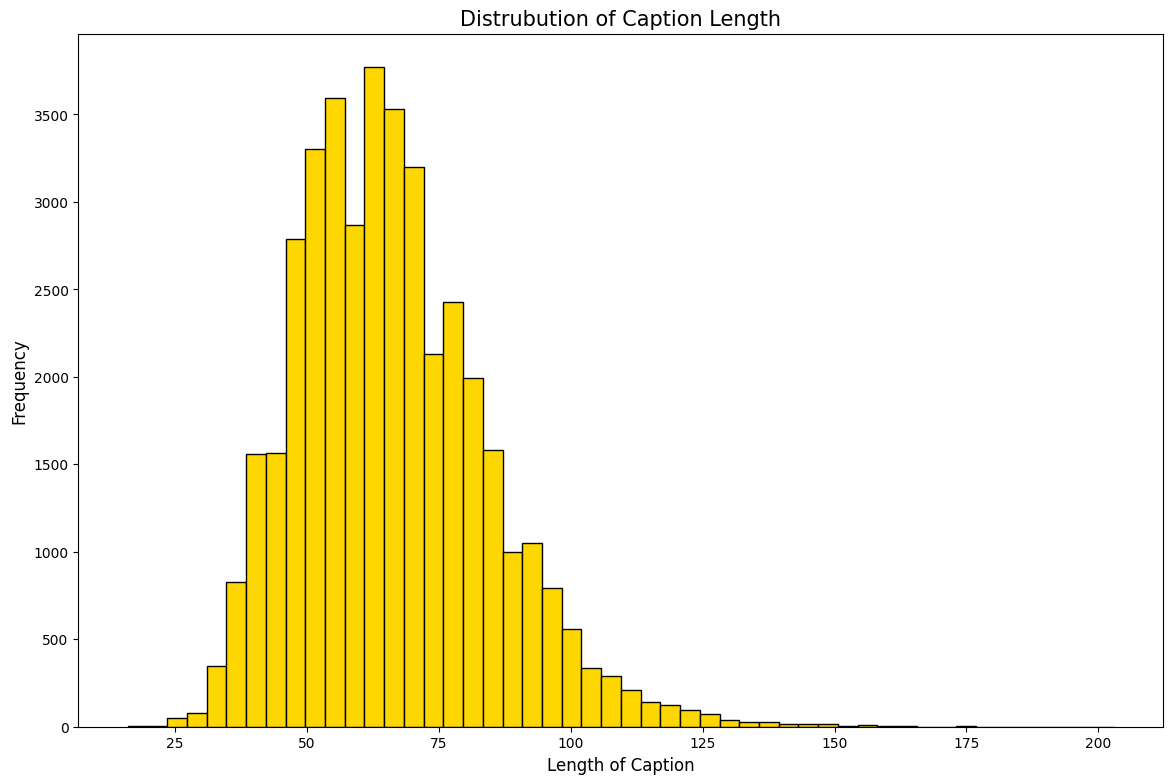

In [ ]:
# Plot the distribution of caption length
plot_histogram('caption_length', 'Distrubution of Caption Length', 'Length of Caption', 'Frequency', 50, 'gold');

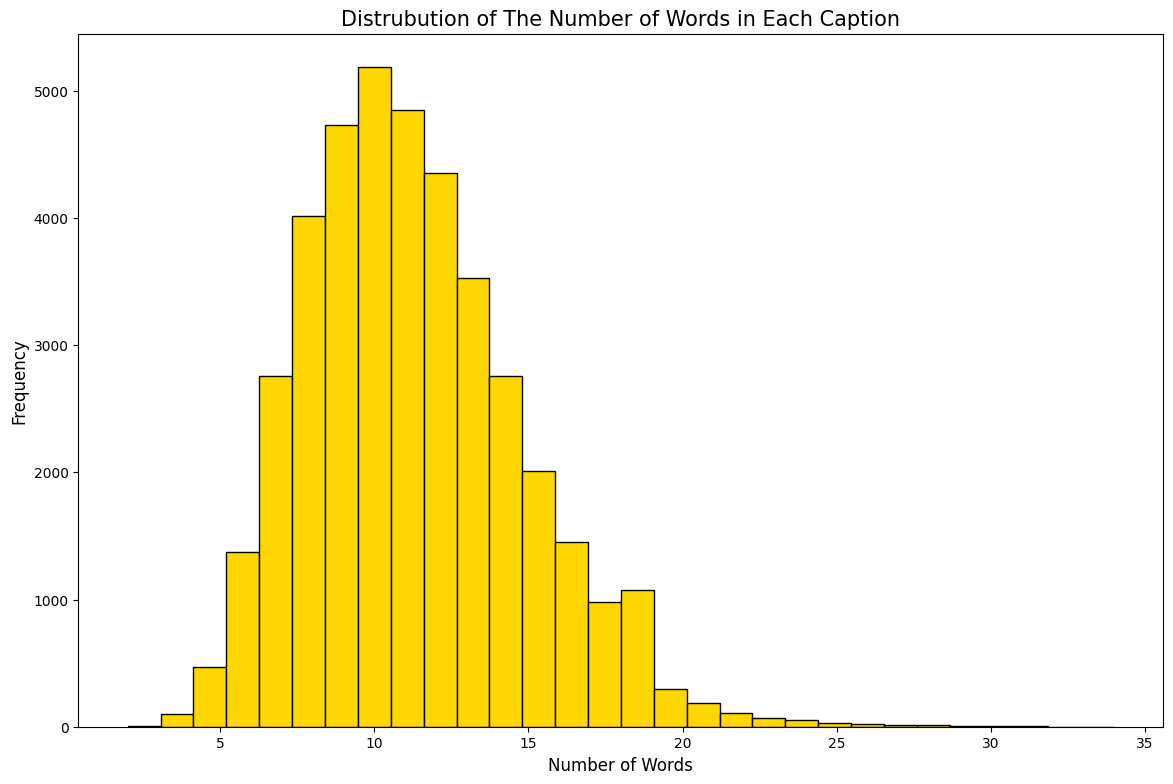

In [ ]:
# Plot the distribution of number of words in captions
plot_histogram('c_word_count', 'Distrubution of The Number of Words in Each Caption', 'Number of Words', 'Frequency',
               30, 'gold')

### **Vectorize The Text**

The resulting plot can provide insights into the most frequent words. By having this plot we could see that most images are about people and dogs, explaining what they are wearing or doing with color detail descriptions.

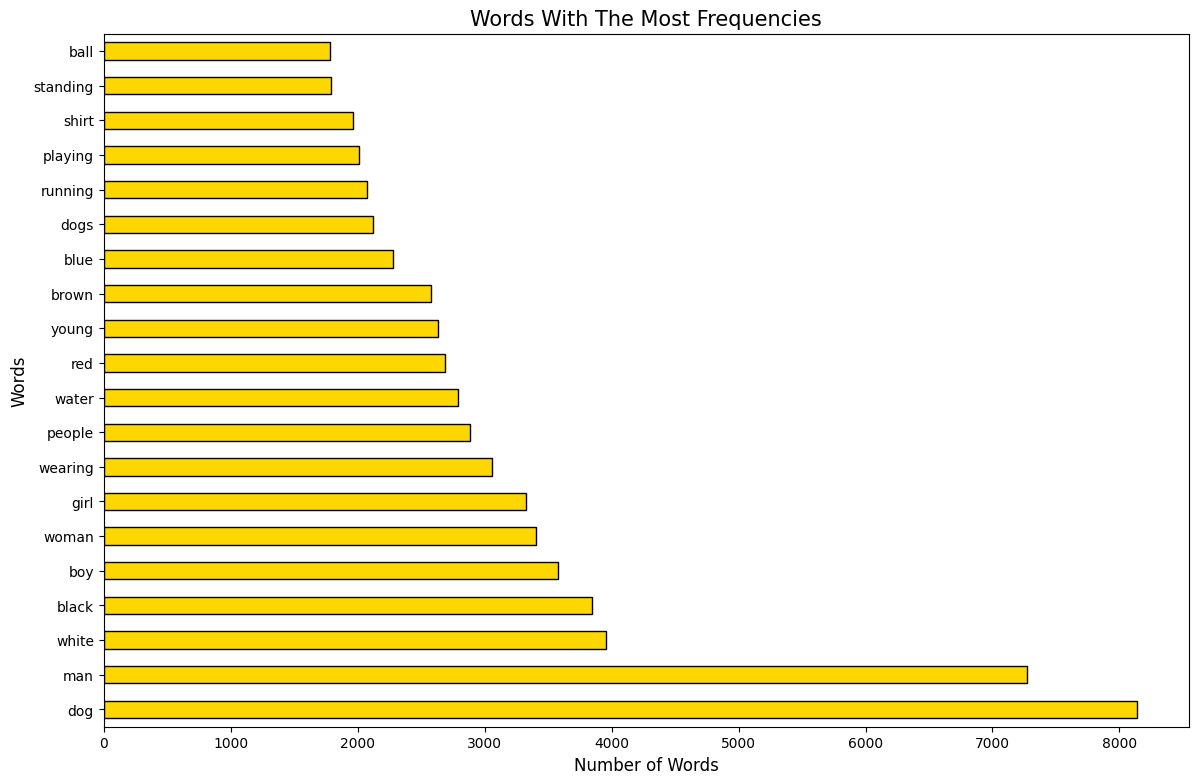

In [ ]:
# Instantiate the countvectorizer with removing english stopwords from the resulting tokens 
X = df['caption']
cvec = CountVectorizer(stop_words='english')

# Fit
cvec.fit(X)

# Transform
X = cvec.transform(X)

# Convert X to dataframe
df_vec = pd.DataFrame(X.todense(), columns= cvec.get_feature_names_out()).drop(columns=['startsen', 'endsen'], axis=1)

# Plot most occured words
plt.figure(figsize=(14, 9))
df_vec.sum().sort_values(ascending=False).head(20).plot(kind='barh',
                                        color='gold', edgecolor='black')
plt.title('Words With The Most Frequencies', fontsize=15)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Words', fontsize=12);

<a name='EDA-Cleaning-Summary'></a>
## **EDA and Cleaning Summary**

- In this notebook we analyzed the image and caption data to get an understanding of the dataset's characteristics. 
- Cleaned the captions by applying several pre-processing steps, such as lowercasing, removing special characters, extra spaces, and single characters. Beside that, we added start and end tokens which are important because they help the image caption model understand the beginning and end of each caption
- Created a new dataset that includes cleaned image-caption pairs. This cleaned dataset will serve as the input for training the image caption model.
- Also plotted a histogram of caption lengths to understand the distribution of caption lengths in the cleaned dataset. This visualization helps inform the choice of hyperparameters for the model, such as the maximum caption length.





